In [ ]:
#T3 Математическая статистика Люлюшкина Алина 4 семестр

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#T2. Случайная величина имеет экспоненциальный закон распределения
    #p(x) = {e^(-x) при x >= 0 | 0 при x <0}
    #Сгенерируйте выборку объема n = 25

In [30]:
n = 25
lambda1 = 1
sample = np.random.exponential(scale=lambda1, size=n)
sample.sort()
print("Выборка объема 25")
print(sample)

Выборка объема 25
[0.0521247  0.13086011 0.13967824 0.19357939 0.19762267 0.21674689
 0.23551649 0.40566242 0.43703169 0.48036267 0.52617811 0.5357521
 0.56500941 0.58087352 0.63857444 0.70417125 0.80884603 0.97964806
 1.15476476 1.18158236 1.9754941  2.35281473 2.58497543 2.84836292
 3.46015761]


In [31]:
mode = stats.mode(sample, keepdims=True)
print("Мода: ", mode.mode if mode.count > 1 else "все элементы")

Мода:  все элементы


In [32]:
print("Медиана: ", np.median(sample))

Медиана:  0.565009410799549


In [33]:
print("Размах: ", np.max(sample) - np.min(sample))

Размах:  3.4080329073171054


In [34]:
mean = np.mean(sample)
third_central_moment = np.sum((sample - mean)**3) / n
second_central_moment = np.sum((sample - mean)**2) / n
assimetria_koefficient = third_central_moment / (second_central_moment**(3/2))
print("Коэффициент ассиметрии: ", assimetria_koefficient)

Коэффициент ассиметрии:  1.3797453169501885


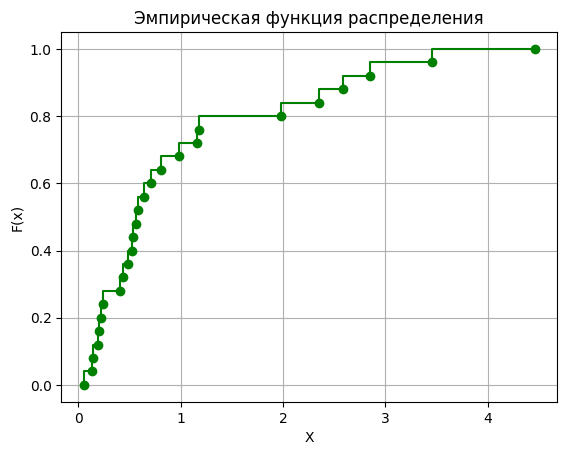

In [35]:
y = np.arange(len(sample))/n

x = np.append(sample, (sample[-1]+1))
y = np.append(y, 1)
plt.grid()
plt.step(x, y, '-go')

plt.title('Эмпирическая функция распределения')
plt.xlabel('X')
plt.ylabel('F(x)')

plt.show()

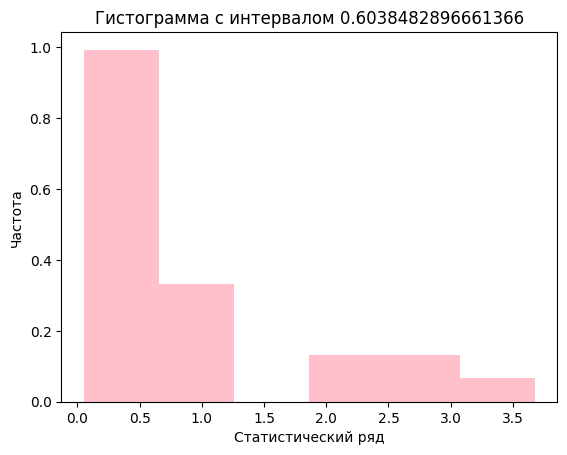

In [67]:
delta = (np.max(sample) - np.min(sample)) / (1+np.log2(n))


# Гистограмма
plt.hist( sample, bins=np.arange(min(sample), max(sample) + delta, delta), density=True, 
         color='pink')
plt.xlabel('Статистический ряд')
plt.ylabel('Частота')
plt.title(f'Гистограмма с интервалом {delta}')

plt.show()


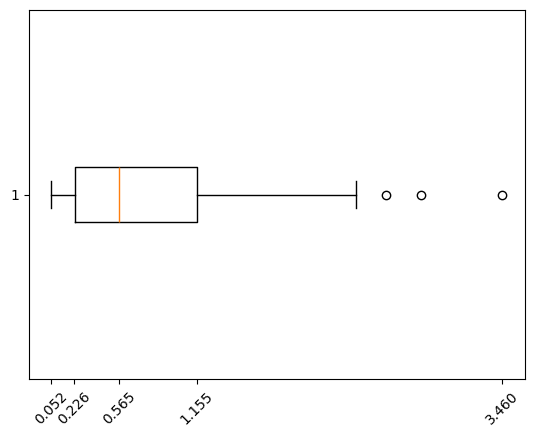

In [46]:
#BOOTSTRAP (среднее арифметическое):

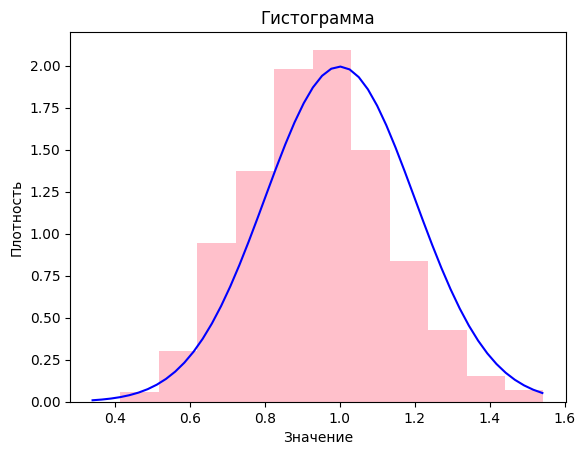

In [68]:
N = 1000
subarrays = np.random.choice(sample, size=(N, n), replace=True) 
subarrays_means = np.mean(subarrays, axis=1) 

fig, ax = plt.subplots()
delta = (np.max(subarrays_means) - np.min(subarrays_means)) / (1+np.log2(len(subarrays_means)))
ax.hist(subarrays_means,
        bins=np.arange(min(subarrays_means), max(subarrays_means) + delta, delta),
        density=True, color='pink')

x = np.linspace(np.mean(subarrays_means)-3*1/5, np.mean(subarrays_means)+3*1/5)
y = (5 / (2*np.pi)**(1/2)) * np.exp(-25/2 * (x-1)**2 )
ax.plot(x, y, 'blue')

plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма')

plt.show()

In [ ]:
#BOOTSTRAP(коэффициент ассиметрии):

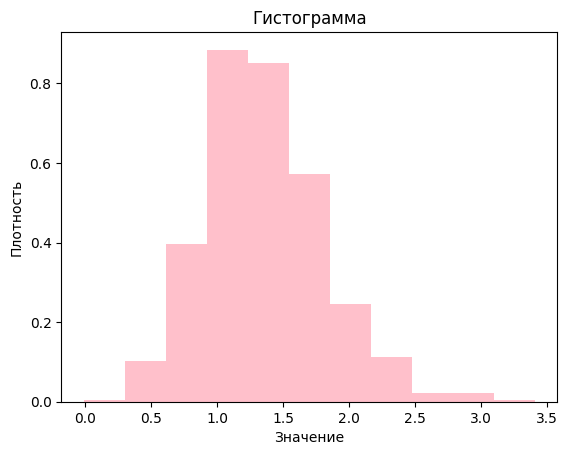

In [69]:
subarrays = np.random.choice(sample, size=(N, n), replace=True)

mean = np.mean(subarrays, axis=1, keepdims=True)
third_central_moment = np.sum((subarrays - mean)**3, axis=1) / subarrays.shape[1]
second_central_moment = np.sum((subarrays - mean)**2, axis=1) / subarrays.shape[1]
asymmetry_coefficient = third_central_moment / (second_central_moment**(3/2))

fig, ax = plt.subplots()
delta = (np.max(asymmetry_coefficient) - np.min(asymmetry_coefficient)) / (1+np.log2(len(asymmetry_coefficient)))
ax.hist(asymmetry_coefficient, 
        bins=np.arange(min(asymmetry_coefficient), max(asymmetry_coefficient) + delta, delta), 
        density=True, color='pink')

plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма')

plt.show()

In [ ]:
#BOOTSTRAP(медиана):

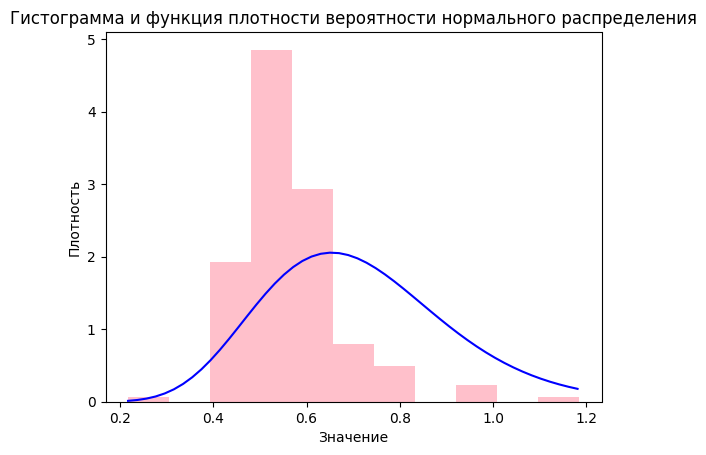

In [70]:
subarrays = np.random.choice(sample, size=(N, n), replace=True) 
subarrays_medians = np.median(subarrays, axis=1) 

fig, ax = plt.subplots()
delta = (np.max(subarrays_medians) - np.min(subarrays_medians)) / (1+np.log2(len(subarrays_medians)))
ax.hist(subarrays_medians, 
        bins=np.arange(min(subarrays_medians), max(subarrays_medians) + delta, delta), 
        density=True, color='pink')

x = np.linspace(np.min(subarrays_medians), np.max(subarrays_medians))
y = 25 * 2704156 * (np.exp(-x))**13 * (1-np.exp(-x))**12
ax.plot(x, y, 'blue')

plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма и функция плотности вероятности нормального распределения')

plt.show()